In [ ]:
#@title Stock Market Analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')a
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# Define list of companies and their respective tickers
companies = {
    'APPLE': 'AAPL',
    'GOOGLE': 'GOOG',
    'MICROSOFT': 'MSFT',
    'AMAZON': 'AMZN'
}

helpers = ['cp1', 'cp2', 'cp3', 'cp4']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

tech_list = list(companies.values())

# Loop through companies and download data using ticker
for (company, ticker), helper in zip(companies.items(), helpers):
    data = yf.download(ticker, start, end)
    data['company_name'] = company
    company_data[helper] = data

# company_list = [AAPL, GOOG, MSFT, AMZN]
company_list = [company_data['cp1'], company_data['cp2'], company_data['cp3'], company_data['cp4']]


# Concatenate all company data into a single dataframe
df = pd.concat(company_data.values(), axis=0)

# View the last 10 rows of the combined dataframe
df.tail(10)

SyntaxError: ignored

In [ ]:
# Summary Stats

company_data['cp1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-04-12 to 2023-04-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


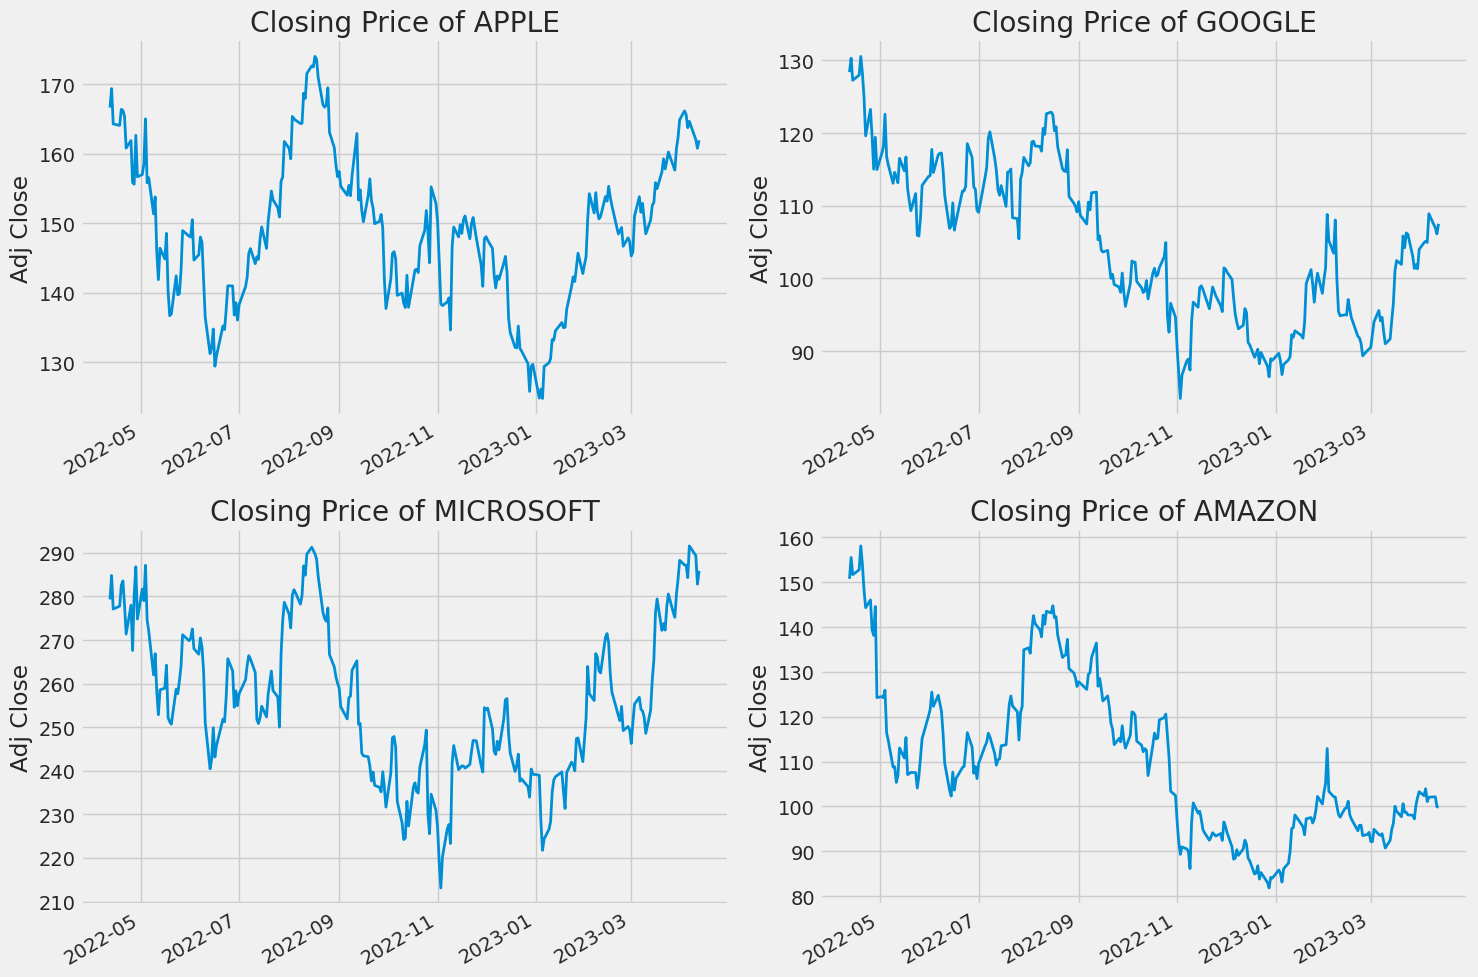

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth=2)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {list(companies.keys())[i - 1]}")
    
plt.tight_layout()

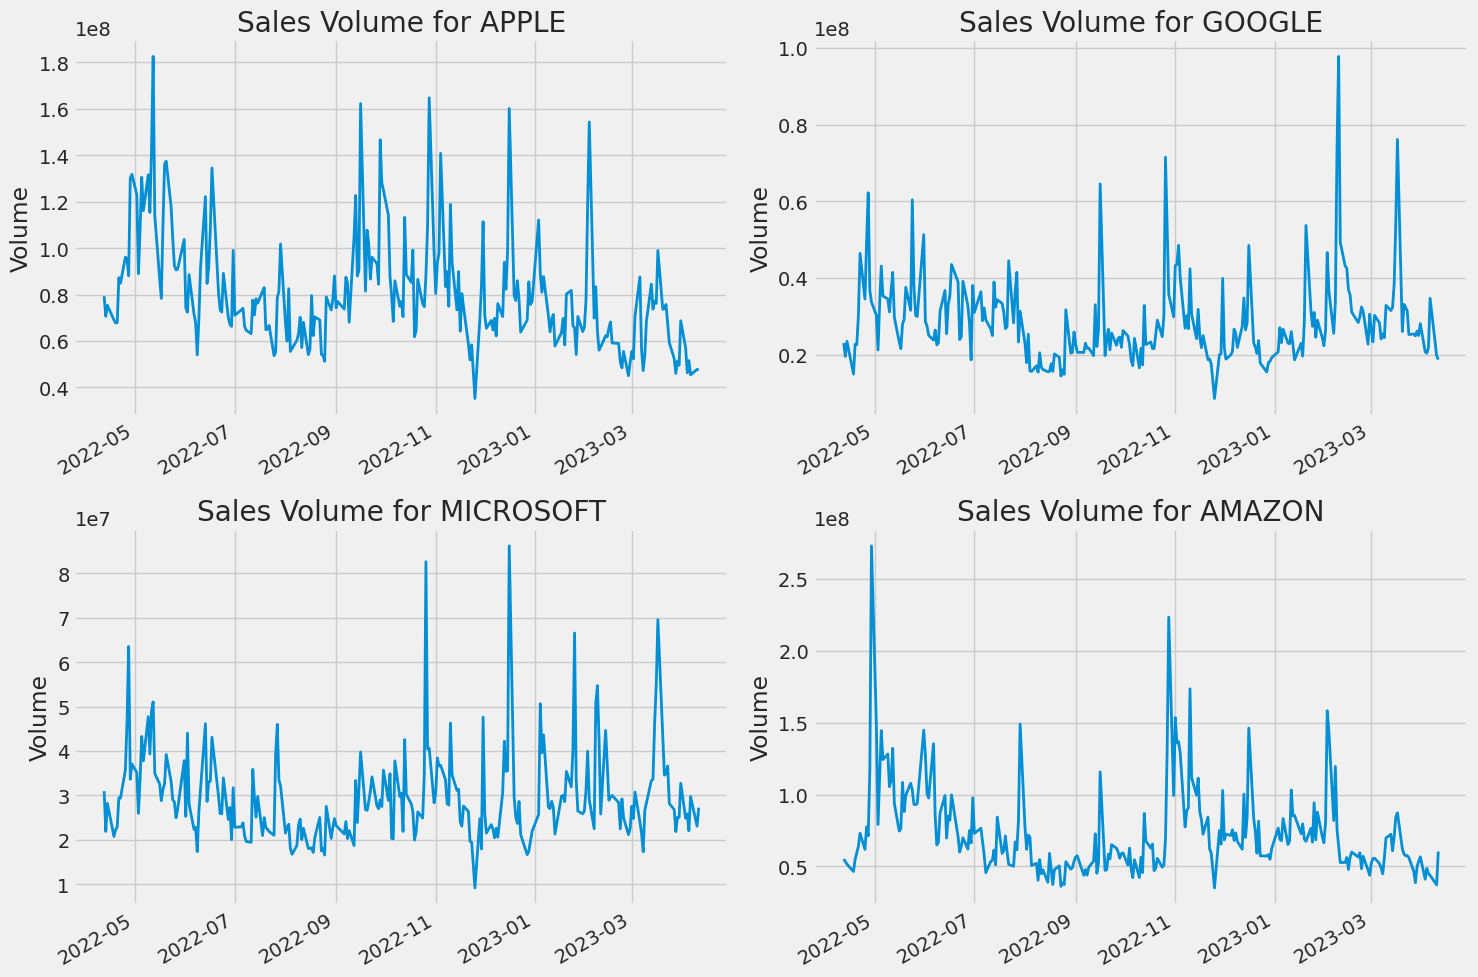

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(linewidth=2)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {list(companies.keys())[i - 1]}")
    
plt.tight_layout()

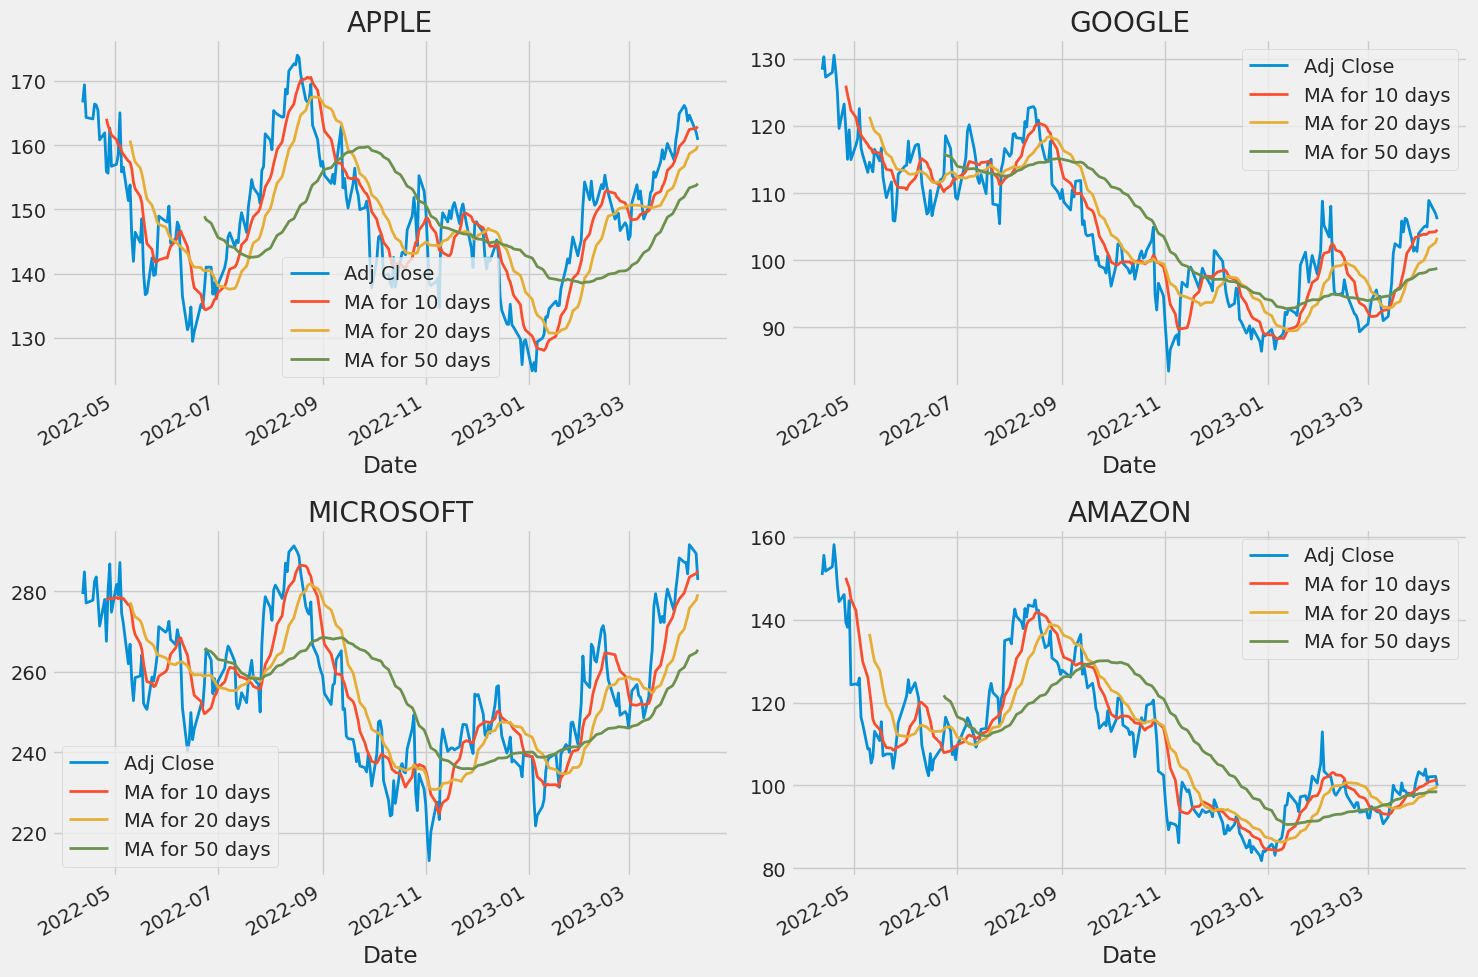

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_data.values():
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for ax, company in zip(axes.flatten(), company_data.values()):
    company[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax,linewidth=2)
    ax.set_title(company['company_name'].iloc[0])

fig.tight_layout()

In [ ]:

# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-12,NaN,NaN,NaN,NaN
2022-04-13,0.016343,0.031524,0.014890,0.019712
2022-04-14,-0.029988,-0.024653,-0.023280,-0.027084
2022-04-18,-0.001331,0.007109,0.005564,0.002466
2022-04-19,0.014115,0.034889,0.020084,0.017040


Text(0.5, 1.0, 'Correlation of stock closing price')

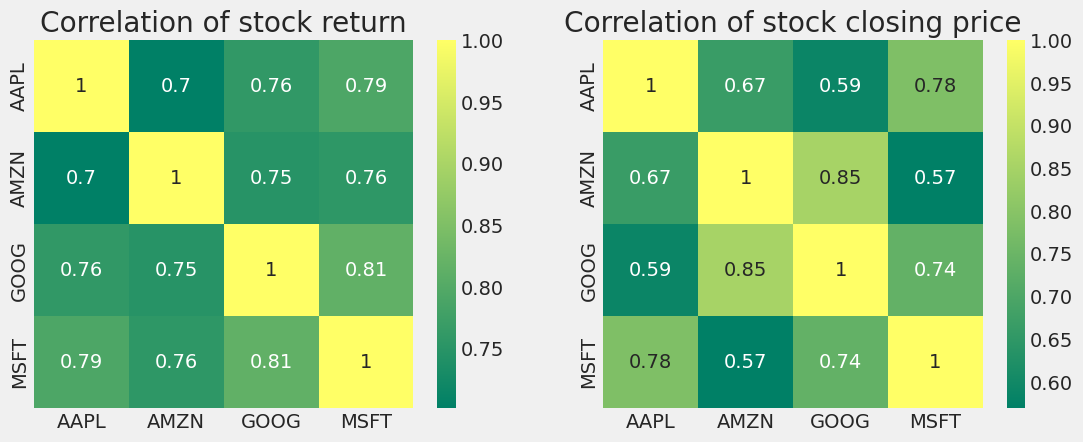

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

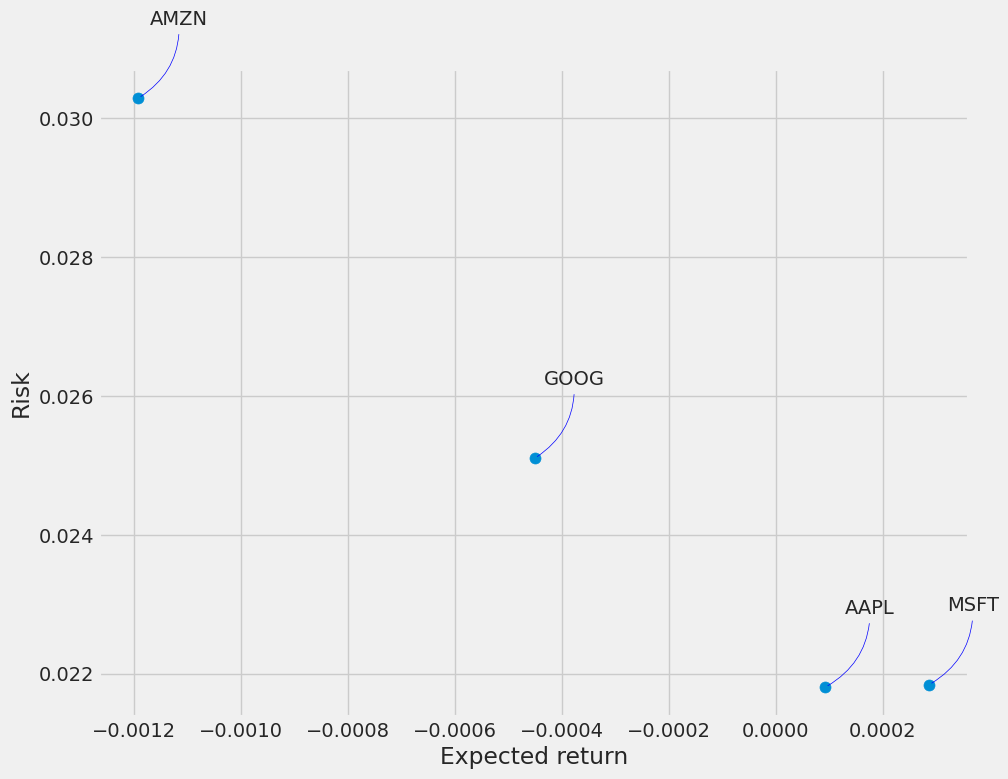

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

[*********************100%***********************]  1 of 1 completed
13/13 [==============================] - 1s 23ms/step
RMSE: 0.7446391582489014


<ipython-input-135-3aa0c18ddb9f>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


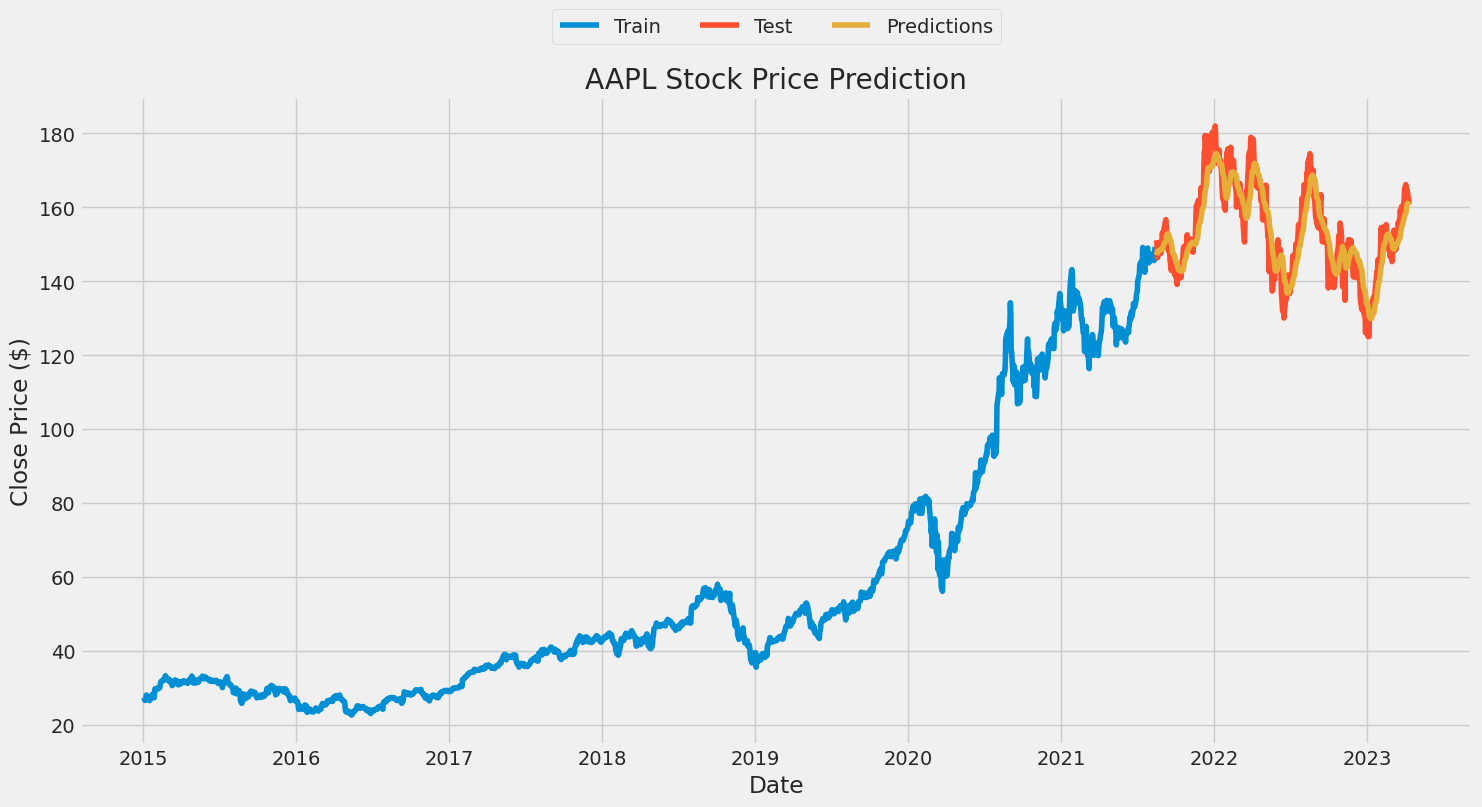

In [ ]:
#@title Stock Market Prediction using LSTM
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout



# set the start and end dates for the data
start_date = '2015-01-01'
end_date = datetime.now()

# define the stock symbol
stock_symbol = 'AAPL'

# get the data from Yahoo Finance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# select the 'Close' column for the prediction
data = data.filter(['Close'])

# convert the data to a numpy array
dataset = data.values

# get the number of rows to train the model on
training_data_len = int(np.ceil(0.8 * len(dataset)))

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# create the training data
train_data = scaled_data[0:training_data_len, :]

# split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# convert the training data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# reshape the data for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# create the testing data
test_data = scaled_data[training_data_len - 60:, :]

# split the data into x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# convert the testing data to numpy arrays
x_test = np.array(x_test)

# reshape the data for LSTM input
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# make the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print('RMSE:', rmse)

# plot the data and predictions
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title(stock_symbol + ' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']],)
plt.legend(['Train', 'Test', 'Predictions'], loc='upper center',bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2021-08-16,151.119995,147.073669
2021-08-17,150.190002,147.484283
2021-08-18,146.360001,147.929398
2021-08-19,146.699997,148.132126
2021-08-20,148.190002,148.186249
...,...,...
2023-04-04,165.630005,159.226074
2023-04-05,163.759995,160.087463
2023-04-06,164.660004,160.773361


(1, 5, 1)
1/1 [==============================] - 0s 70ms/step


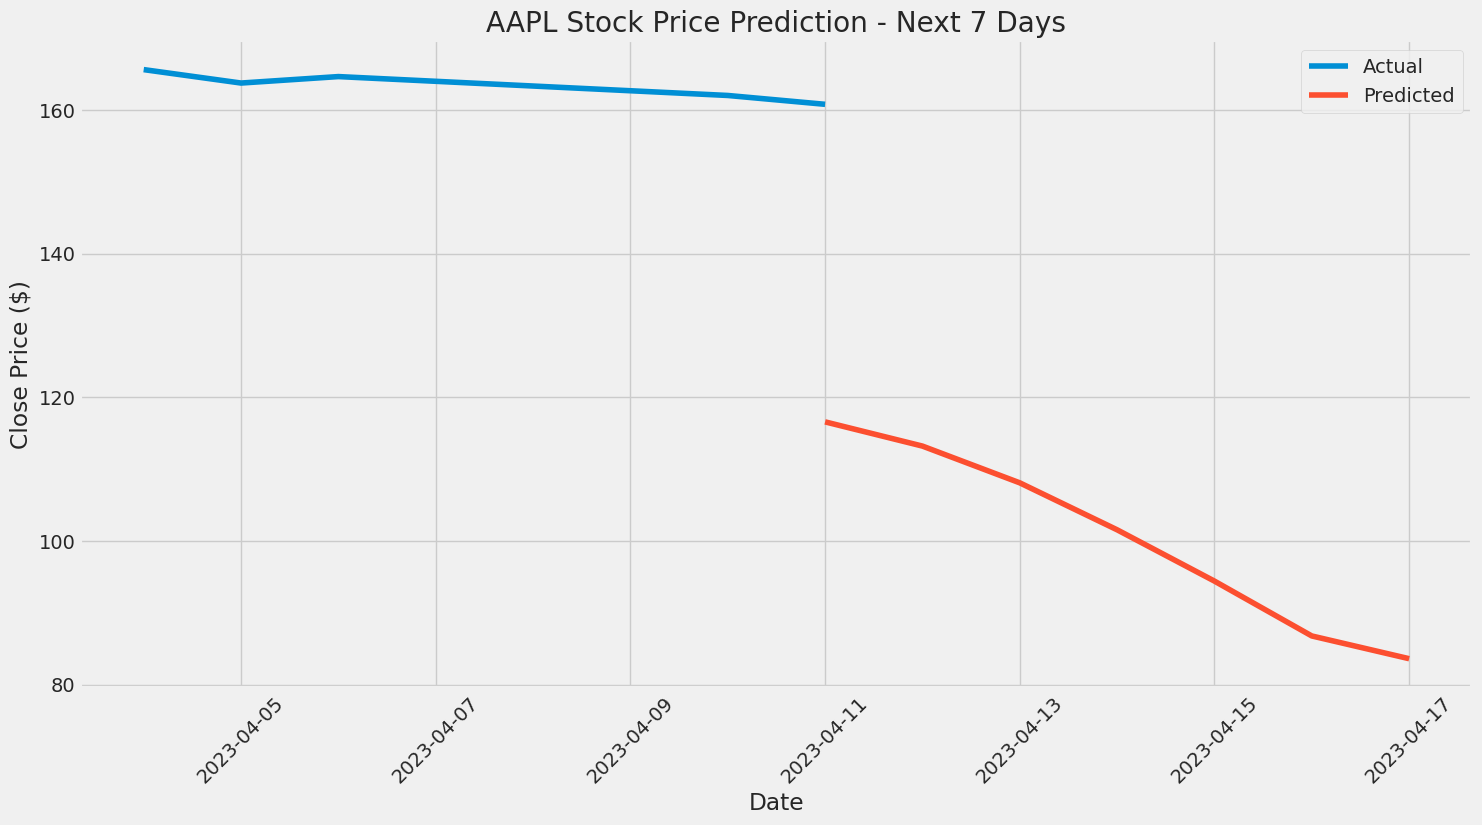

                     0       Close
2023-04-04  165.630005         NaN
2023-04-05  163.759995         NaN
2023-04-06  164.660004         NaN
2023-04-10  162.029999         NaN
2023-04-11  160.800003         NaN
2023-04-11         NaN  116.591011
2023-04-12         NaN  113.220261
2023-04-13         NaN  108.102631
2023-04-14         NaN  101.566040
2023-04-15         NaN   94.423386
2023-04-16         NaN   86.786942
2023-04-17         NaN   83.620438


In [ ]:
# get the last 15 days data from the actual data
last_15_days = data['Close'][-5:].values

# scale the data
last_15_days_scaled = scaler.transform(last_15_days.reshape(-1,1))

# create an empty list for the predicted data
X_test = []

# append the last 15 day data to the list
X_test.append(last_15_days_scaled)

# convert the test data to a numpy array
X_test = np.array(X_test)

# check the shape of the array before reshaping
print(X_test.shape)

# reshape the data for LSTM input
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# get the predicted scaled price values
predicted_prices = []
for i in range(7):
    prediction = model.predict(X_test)
    predicted_prices.append(prediction)
    # remove the first value of the input data and append the predicted value
    X_test = np.concatenate((X_test[:,1:,:], prediction.reshape(1,1,1)), axis=1)

# inverse transform the predicted prices to the actual prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1,1))

# create a DataFrame for the predicted prices
days = pd.date_range(data.index[-1], periods=7, freq='D')
predicted_prices_df = pd.DataFrame(predicted_prices, index=days, columns=['Close'])

# concatenate the actual and predicted prices data frames
combined_df = pd.concat([data['Close'][-5:], predicted_prices_df])

# plot the actual and predicted prices for the next 7 days
plt.figure(figsize=(16,8))
plt.title(stock_symbol + ' Stock Price Prediction - Next 7 Days')
plt.plot(combined_df)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.xticks(rotation=45)
plt.show()

print(combined_df)